In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from fastai import *
from fastai.vision import *
from fastai.metrics import *

In [ ]:
!pip install fastai

In [2]:
path = Path('/kaggle/input/best-artworks-of-all-time/images/images/')

In [3]:
src = ImageList.from_folder(path).split_by_rand_pct(0.2).label_from_folder()

In [ ]:
src

In [4]:
tfms = get_transforms()

In [5]:
data = (src.transform(tfms, size=112).databunch(bs=32).normalize(imagenet_stats))

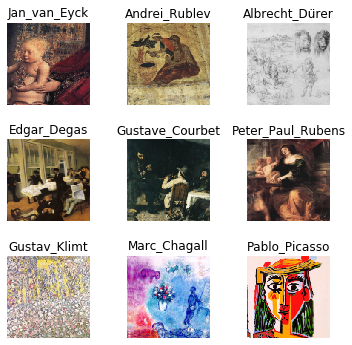

In [6]:
data.show_batch(rows=3, figsize=(5,5))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Albrecht_Dürer',
  'Albrecht_Du╠êrer',
  'Alfred_Sisley',
  'Amedeo_Modigliani',
  'Andrei_Rublev',
  'Andy_Warhol',
  'Camille_Pissarro',
  'Caravaggio',
  'Claude_Monet',
  'Diego_Rivera',
  'Diego_Velazquez',
  'Edgar_Degas',
  'Edouard_Manet',
  'Edvard_Munch',
  'El_Greco',
  'Eugene_Delacroix',
  'Francisco_Goya',
  'Frida_Kahlo',
  'Georges_Seurat',
  'Giotto_di_Bondone',
  'Gustav_Klimt',
  'Gustave_Courbet',
  'Henri_Matisse',
  'Henri_Rousseau',
  'Henri_de_Toulouse-Lautrec',
  'Hieronymus_Bosch',
  'Jackson_Pollock',
  'Jan_van_Eyck',
  'Joan_Miro',
  'Kazimir_Malevich',
  'Leonardo_da_Vinci',
  'Marc_Chagall',
  'Michelangelo',
  'Mikhail_Vrubel',
  'Pablo_Picasso',
  'Paul_Cezanne',
  'Paul_Gauguin',
  'Paul_Klee',
  'Peter_Paul_Rubens',
  'Pierre-Auguste_Renoir',
  'Piet_Mondrian',
  'Pieter_Bruegel',
  'Raphael',
  'Rembrandt',
  'Rene_Magritte',
  'Salvador_Dali',
  'Sandro_Botticelli',
  'Titian',
  'Vasiliy_Kandinskiy',
  'Vincent_van_Gogh',
  'William_Turner'],
 

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate,model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(3, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,2.991492,2.225790,0.558723,06:33
1,2.028729,1.538337,0.448119,06:24
2,1.536797,1.322138,0.386545,06:21


In [10]:
learn.save('stage1')

In [ ]:
learn.load('stage1')

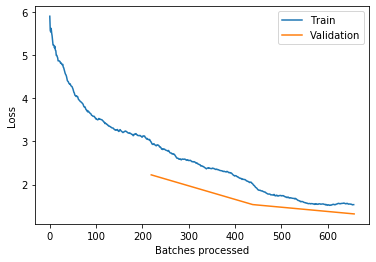

In [11]:
learn.recorder.plot_losses()

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


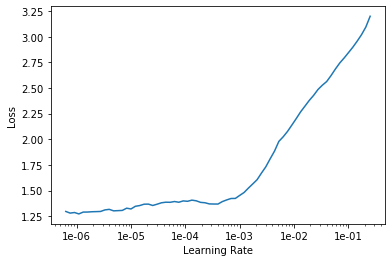

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,1.377797,1.314516,0.389966,06:26
1,1.295413,1.279773,0.384265,06:57
2,1.337997,1.262821,0.386545,06:23
3,1.312454,1.258328,0.379133,06:21
4,1.292000,1.259468,0.376853,06:19


In [16]:
learn.save('stage-2')

In [17]:
learn.freeze()

In [18]:
data2 = (src.transform(tfms, size=224).databunch(bs=32).normalize(imagenet_stats))

In [19]:
learn.data=data2

In [20]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


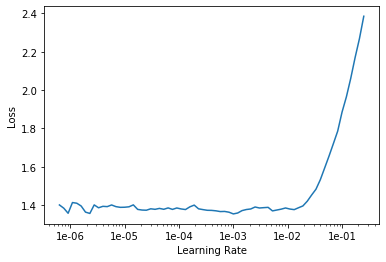

In [21]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(3, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.282596,1.045013,0.321551,07:54
1,1.099130,0.952277,0.289624,07:51
2,0.993741,0.920208,0.285633,07:49


In [24]:
learn.unfreeze()

In [25]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


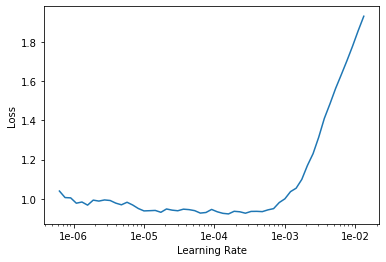

In [26]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.637976,1.205913,0.336944,07:48
1,0.970839,1.052326,0.298746,07:44
2,0.695616,0.726693,0.224059,07:45
3,0.413473,0.606277,0.187571,07:46
4,0.264707,0.584152,0.193843,07:44


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


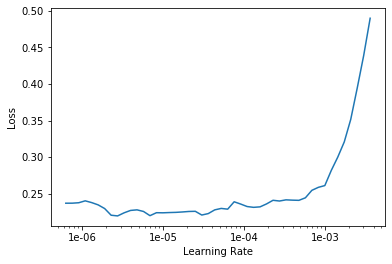

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 

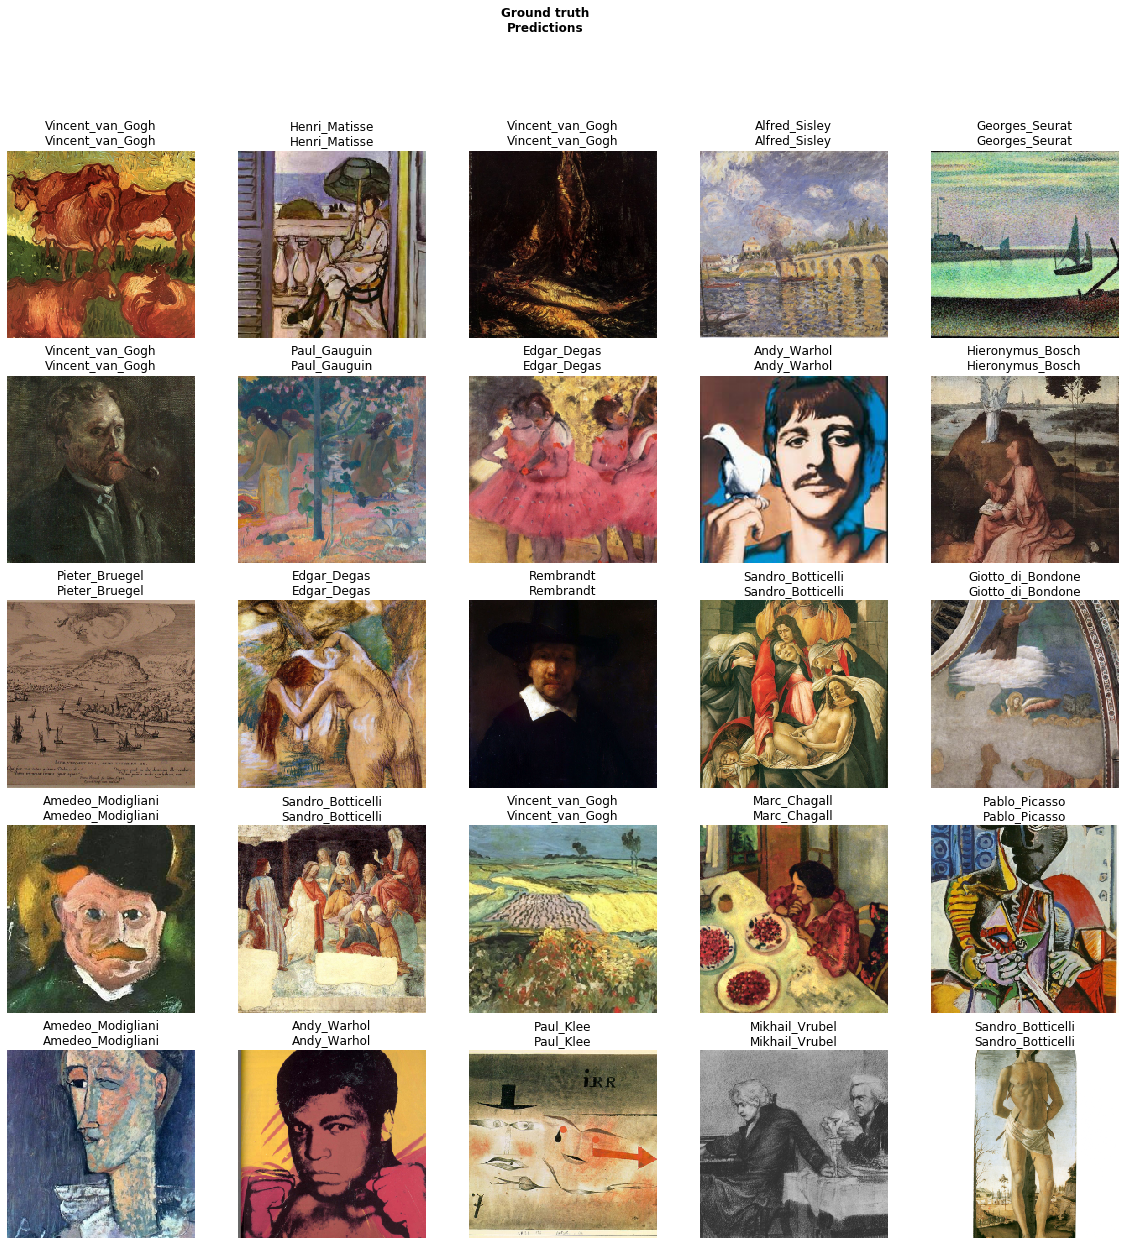

In [32]:
learn.show_results()

In [33]:
learn.save('stage3')

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

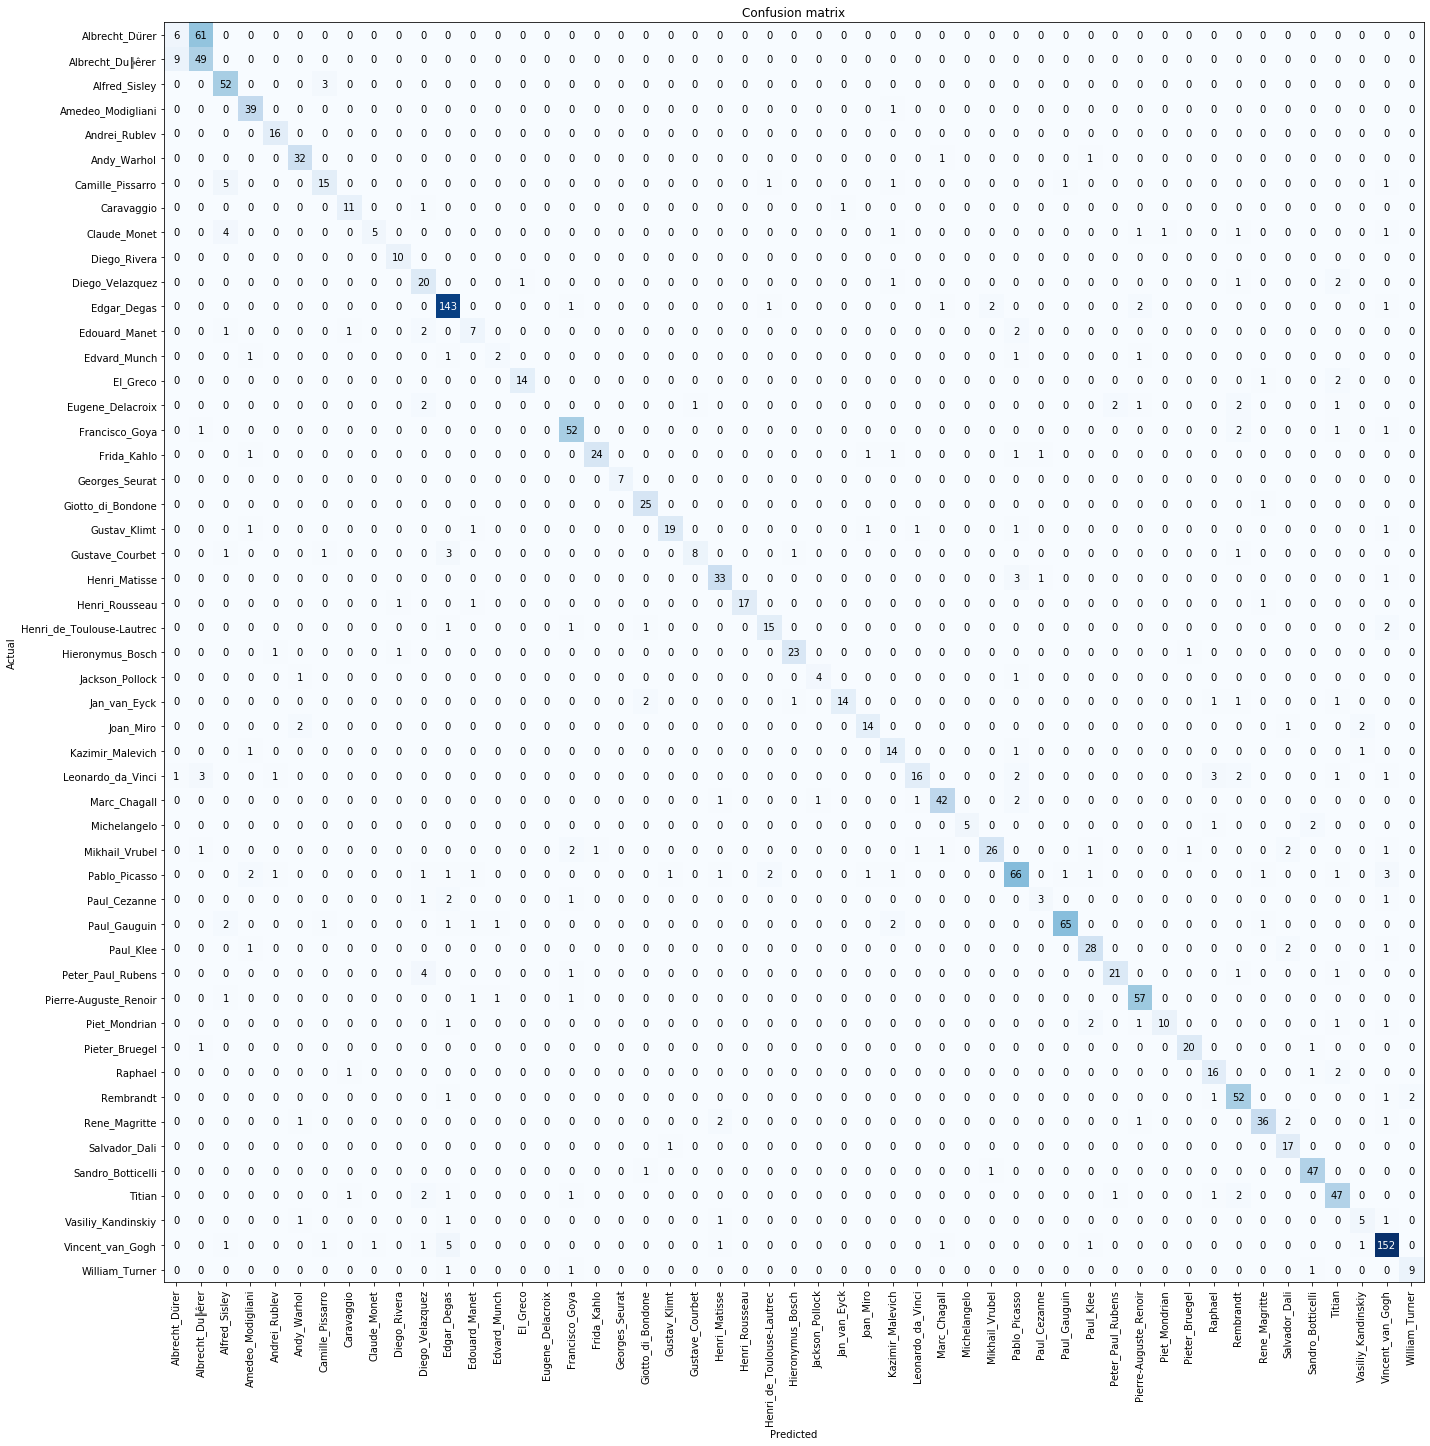

In [38]:
interp.plot_confusion_matrix(figsize=(20,20))

In [ ]:
interp.plot_top_losses(9,heatmap=True)